# script to use RBM to study the attractor dynamics of response

In [6]:
% matplotlib inline

##
import importlib
import time
import numpy as np
import tensorflow as tf

import utils
import EBMs_tensorflow


importlib.reload(EBMs_tensorflow)

# load nmist data
(X_dtr, y_dtr), (X_dvl, y_dvl), (X_dts, y_dts) = utils.load_data()

m0, m1 = 784, 512
batchsize = 32

n_total = X_dtr.shape[0]
path_log_dir = '../model_log'

... loading data


# training

In [3]:
# create model adn tf computational graph


importlib.reload(EBMs_tensorflow.ebm)
importlib.reload(EBMs_tensorflow.rbm)
importlib.reload(EBMs_tensorflow)
model = EBMs_tensorflow.rbm.RestrictedBoltzmannMachine(m0, m1, batchsize=batchsize, path_log_dir=path_log_dir)

model.init_graph()
model.create_training_graph()

{'b0': <tf.Tensor 'CD/grad_update/AssignAdd:0' shape=(784,) dtype=float32_ref>, 'b1': <tf.Tensor 'CD/grad_update/AssignAdd_1:0' shape=(512,) dtype=float32_ref>, 'w': <tf.Tensor 'CD/grad_update/AssignAdd_2:0' shape=(784, 512) dtype=float32_ref>}


/shared/homes/sguan/Coding_Projects/DynamicNN/EBMs_tensorflow/rbm.py:353: UserWarning: given path_log_dir ./model_log does not exist
  warnings.warn('given path_log_dir {} does not exist'.format(self.path_log_dir))


In [3]:
# train from scratch

model.run_training(x0_data=X_dtr, num_epochs=20)


model paramter ['b0', 'b1', 'w'] updated from file
step=   0_    0, energy=+0.062357, sec/batch=0.07347, ms/sample=2.296
step=   0_  100, energy=+59.312, sec/batch=0.02194, ms/sample=0.6855
step=   0_  200, energy=+57.779, sec/batch=0.0191, ms/sample=0.597
step=   0_  300, energy=+39.528, sec/batch=0.01917, ms/sample=0.5992
step=   0_  400, energy=+42.109, sec/batch=0.0192, ms/sample=0.6001
step=   0_  500, energy=+28.57, sec/batch=0.01918, ms/sample=0.5995
step=   0_  600, energy=+38.026, sec/batch=0.01917, ms/sample=0.599
step=   0_  700, energy=+32.392, sec/batch=0.01916, ms/sample=0.5987
step=   0_  800, energy=+13.727, sec/batch=0.01914, ms/sample=0.5983
step=   0_  900, energy=-2.507, sec/batch=0.01918, ms/sample=0.5995
step=   0_ 1000, energy=-1.7444, sec/batch=0.01927, ms/sample=0.6023
step=   0_ 1100, energy=-32.771, sec/batch=0.01913, ms/sample=0.5979
step=   0_ 1200, energy=-26.713, sec/batch=0.01915, ms/sample=0.5985
step=   0_ 1300, energy=-22.265, sec/batch=0.01914, ms/sa

step=   7_  700, energy=-133.39, sec/batch=0.01921, ms/sample=0.6004
step=   7_  800, energy=-144.61, sec/batch=0.02153, ms/sample=0.6729
step=   7_  900, energy=-118.56, sec/batch=0.01919, ms/sample=0.5997
step=   7_ 1000, energy=-137.69, sec/batch=0.01927, ms/sample=0.6021
step=   7_ 1100, energy=-142.85, sec/batch=0.01926, ms/sample=0.602
step=   7_ 1200, energy=-119.34, sec/batch=0.01921, ms/sample=0.6004
step=   7_ 1300, energy=-133.15, sec/batch=0.01916, ms/sample=0.5987
step=   7_ 1400, energy=-119.38, sec/batch=0.01918, ms/sample=0.5994
step=   7_ 1500, energy=-141.79, sec/batch=0.01933, ms/sample=0.604
step=   8_    0, energy=-139.68, sec/batch=0.0119, ms/sample=0.372
step=   8_  100, energy=-146.52, sec/batch=0.01917, ms/sample=0.599
step=   8_  200, energy=-153.32, sec/batch=0.01908, ms/sample=0.5963
step=   8_  300, energy=-128.57, sec/batch=0.01911, ms/sample=0.5972
step=   8_  400, energy=-148.19, sec/batch=0.0192, ms/sample=0.5999
step=   8_  500, energy=-138.49, sec/bat

step=  14_ 1500, energy=-145.59, sec/batch=0.01921, ms/sample=0.6002
step=  15_    0, energy=-147.86, sec/batch=0.0119, ms/sample=0.372
step=  15_  100, energy=-153.69, sec/batch=0.01937, ms/sample=0.6054
step=  15_  200, energy=-161.6, sec/batch=0.01935, ms/sample=0.6047
step=  15_  300, energy=-153.24, sec/batch=0.01929, ms/sample=0.6027
step=  15_  400, energy=-169.84, sec/batch=0.01916, ms/sample=0.5986
step=  15_  500, energy=-155.59, sec/batch=0.01906, ms/sample=0.5956
step=  15_  600, energy=-156.25, sec/batch=0.01942, ms/sample=0.6069
step=  15_  700, energy=-154.89, sec/batch=0.01925, ms/sample=0.6015
step=  15_  800, energy=-155.13, sec/batch=0.01915, ms/sample=0.5984
step=  15_  900, energy=-152.48, sec/batch=0.01918, ms/sample=0.5995
step=  15_ 1000, energy=-151.19, sec/batch=0.01919, ms/sample=0.5998
step=  15_ 1100, energy=-150.25, sec/batch=0.01908, ms/sample=0.5964
step=  15_ 1200, energy=-154.79, sec/batch=0.01898, ms/sample=0.5931
step=  15_ 1300, energy=-151.2, sec/b

In [5]:
# save trained parameters to file
model.save_parameters(filename='RBM_tf_20_epoch')

writing model parameters to file ../model_save/RBM_tf_20_epoch_20180717_135854.h5


In [12]:
# load parameters from file file keep training

model = EBMs_tensorflow.rbm.RestrictedBoltzmannMachine(m0, m1, batchsize=batchsize, path_log_dir=path_log_dir)

model.load_parameters(filename='RBM_tf_20_epoch')

model.init_graph()
model.create_training_graph()

model.run_training(x0_data=X_dtr, num_epochs=10)


reading model parameters from file ../model_save/RBM_tf_20_epoch_20180717_135854.h5
model paramter ['b0', 'b1', 'w'] updated from file
step=   0_    0, energy=-146.13, sec/batch=0.001005, ms/sample=0.03141
step=   0_  100, energy=-167.64, sec/batch=0.01938, ms/sample=0.6055
step=   0_  200, energy=-156.47, sec/batch=0.01917, ms/sample=0.599
step=   0_  300, energy=-152.13, sec/batch=0.01918, ms/sample=0.5992
step=   0_  400, energy=-152.01, sec/batch=0.01915, ms/sample=0.5984
step=   0_  500, energy=-150.27, sec/batch=0.01915, ms/sample=0.5983
step=   0_  600, energy=-150.35, sec/batch=0.01917, ms/sample=0.599
step=   0_  700, energy=-145.05, sec/batch=0.01914, ms/sample=0.5983
step=   0_  800, energy=-142.81, sec/batch=0.01919, ms/sample=0.5998
step=   0_  900, energy=-159.93, sec/batch=0.01911, ms/sample=0.5973
step=   0_ 1000, energy=-162.23, sec/batch=0.0191, ms/sample=0.5969
step=   0_ 1100, energy=-157.52, sec/batch=0.01916, ms/sample=0.5988
step=   0_ 1200, energy=-166.4, sec/ba

step=   7_  600, energy=-158.58, sec/batch=0.01919, ms/sample=0.5996
step=   7_  700, energy=-153.85, sec/batch=0.01913, ms/sample=0.5978
step=   7_  800, energy=-144.34, sec/batch=0.01914, ms/sample=0.5982
step=   7_  900, energy=-154.89, sec/batch=0.01954, ms/sample=0.6106
step=   7_ 1000, energy=-149.08, sec/batch=0.01918, ms/sample=0.5995
step=   7_ 1100, energy=-157.28, sec/batch=0.01923, ms/sample=0.6008
step=   7_ 1200, energy=-152.14, sec/batch=0.01912, ms/sample=0.5974
step=   7_ 1300, energy=-158.7, sec/batch=0.01931, ms/sample=0.6034
step=   7_ 1400, energy=-158.58, sec/batch=0.01939, ms/sample=0.6059
step=   7_ 1500, energy=-156.92, sec/batch=0.01918, ms/sample=0.5994
step=   8_    0, energy=-156.27, sec/batch=0.0119, ms/sample=0.3719
step=   8_  100, energy=-153.26, sec/batch=0.01923, ms/sample=0.6011
step=   8_  200, energy=-158.66, sec/batch=0.01923, ms/sample=0.6009
step=   8_  300, energy=-157.61, sec/batch=0.01925, ms/sample=0.6014
step=   8_  400, energy=-152.63, sec

In [13]:
model.lr = 0.005         # reduce learning rate
model.wd_l2 = 10**(-6)   # reduce L2 weight decay

model.init_graph()
model.create_training_graph()

model.run_training(x0_data=X_dtr, num_epochs=10)

model paramter ['b0', 'b1', 'w'] updated from file
step=   0_    0, energy=-147.44, sec/batch=0.001042, ms/sample=0.03257
step=   0_  100, energy=-140.18, sec/batch=0.01953, ms/sample=0.6102
step=   0_  200, energy=-150.31, sec/batch=0.01932, ms/sample=0.6038
step=   0_  300, energy=-160.86, sec/batch=0.01927, ms/sample=0.6021
step=   0_  400, energy=-154.32, sec/batch=0.01915, ms/sample=0.5985
step=   0_  500, energy=-158.55, sec/batch=0.01929, ms/sample=0.6027
step=   0_  600, energy=-161.35, sec/batch=0.01932, ms/sample=0.6036
step=   0_  700, energy=-159.91, sec/batch=0.01932, ms/sample=0.6037
step=   0_  800, energy=-151.21, sec/batch=0.01926, ms/sample=0.602
step=   0_  900, energy=-160.44, sec/batch=0.01928, ms/sample=0.6024
step=   0_ 1000, energy=-164.99, sec/batch=0.01928, ms/sample=0.6026
step=   0_ 1100, energy=-150.53, sec/batch=0.01925, ms/sample=0.6015
step=   0_ 1200, energy=-181.85, sec/batch=0.01927, ms/sample=0.6022
step=   0_ 1300, energy=-175.31, sec/batch=0.01927,

step=   7_  700, energy=-183.3, sec/batch=0.01917, ms/sample=0.599
step=   7_  800, energy=-195.14, sec/batch=0.01918, ms/sample=0.5993
step=   7_  900, energy=-186.06, sec/batch=0.0191, ms/sample=0.5968
step=   7_ 1000, energy=-182.03, sec/batch=0.0192, ms/sample=0.5999
step=   7_ 1100, energy=-194.33, sec/batch=0.01918, ms/sample=0.5995
step=   7_ 1200, energy=-174.8, sec/batch=0.01917, ms/sample=0.5992
step=   7_ 1300, energy=-178.98, sec/batch=0.01905, ms/sample=0.5953
step=   7_ 1400, energy=-191.31, sec/batch=0.01916, ms/sample=0.5989
step=   7_ 1500, energy=-182.24, sec/batch=0.01911, ms/sample=0.5971
step=   8_    0, energy=-191.35, sec/batch=0.0119, ms/sample=0.372
step=   8_  100, energy=-178.67, sec/batch=0.01918, ms/sample=0.5995
step=   8_  200, energy=-189.69, sec/batch=0.01917, ms/sample=0.5991
step=   8_  300, energy=-189.54, sec/batch=0.01917, ms/sample=0.5991
step=   8_  400, energy=-186.23, sec/batch=0.01921, ms/sample=0.6002
step=   8_  500, energy=-185.89, sec/batc

In [14]:
model.save_parameters(filename='RBM_tf_40_epoch')

writing model parameters to file ../model_save/RBM_tf_40_epoch_20180717_151003.h5


In [68]:
model = EBMs_tensorflow.rbm.RestrictedBoltzmannMachine(m0, m1, batchsize=batchsize, path_log_dir=path_log_dir)

model.load_parameters(filename='RBM_tf_40_epoch')

model.lr = 0.005         # reduce learning rate
model.wd_l2 = 10**(-6)   # reduce L2 weight decay

model.init_graph()
model.create_training_graph()

model.run_training(x0_data=X_dtr, num_epochs=40)

model.save_parameters(filename='RBM_tf_80_epoch')

reading model parameters from file ../model_save/RBM_tf_40_epoch_20180717_151003.h5
(32, 784)
step=   0_     0, energy=-168.33, sec/batch=0.003076, ms/sample=0.09611
step=   3_     4, energy=-174.17, sec/batch=0.01938, ms/sample=0.6057
step=   6_     8, energy=-173.99, sec/batch=0.01909, ms/sample=0.5965
step=   9_    12, energy=-191.19, sec/batch=0.01888, ms/sample=0.59
step=  12_    16, energy=-185.31, sec/batch=0.01905, ms/sample=0.5952
step=  15_    20, energy=-188.09, sec/batch=0.01903, ms/sample=0.5948
step=  18_    24, energy=-177.99, sec/batch=0.01917, ms/sample=0.5989
step=  21_    28, energy=-200.57, sec/batch=0.01903, ms/sample=0.5946
step=  25_     0, energy=-189.51, sec/batch=0.02, ms/sample=0.625
step=  28_     4, energy=-188.25, sec/batch=0.01916, ms/sample=0.5988
step=  31_     8, energy=-194.05, sec/batch=0.01921, ms/sample=0.6002
step=  34_    12, energy=-181.15, sec/batch=0.01885, ms/sample=0.5891
step=  37_    16, energy=-175.8, sec/batch=0.01905, ms/sample=0.5952
s

step= 365_    20, energy=-193.87, sec/batch=0.01915, ms/sample=0.5985
step= 368_    24, energy=-190.95, sec/batch=0.01909, ms/sample=0.5965
step= 371_    28, energy=-194.04, sec/batch=0.0191, ms/sample=0.5969
step= 375_     0, energy=-208.63, sec/batch=0.01916, ms/sample=0.5987
step= 378_     4, energy=-190.53, sec/batch=0.01906, ms/sample=0.5956
step= 381_     8, energy=-201.9, sec/batch=0.01897, ms/sample=0.5928
step= 384_    12, energy=-206.69, sec/batch=0.01901, ms/sample=0.5941
step= 387_    16, energy=-206.59, sec/batch=0.01911, ms/sample=0.5973
step= 390_    20, energy=-202.76, sec/batch=0.01913, ms/sample=0.5979
step= 393_    24, energy=-216.69, sec/batch=0.01915, ms/sample=0.5983
step= 396_    28, energy=-187.54, sec/batch=0.01913, ms/sample=0.5978
step= 400_     0, energy=-196.59, sec/batch=0.01924, ms/sample=0.6011
step= 403_     4, energy=-217.48, sec/batch=0.01896, ms/sample=0.5925
step= 406_     8, energy=-192.83, sec/batch=0.01909, ms/sample=0.5967
step= 409_    12, ener

step= 734_    12, energy=-203.16, sec/batch=0.01914, ms/sample=0.598
step= 737_    16, energy=-200.69, sec/batch=0.01916, ms/sample=0.5989
step= 740_    20, energy=-197.15, sec/batch=0.01906, ms/sample=0.5958
step= 743_    24, energy=-187.55, sec/batch=0.01918, ms/sample=0.5995
step= 746_    28, energy=-169.43, sec/batch=0.01904, ms/sample=0.5949
step= 750_     0, energy=-193.22, sec/batch=0.02077, ms/sample=0.6492
step= 753_     4, energy=-187.46, sec/batch=0.01863, ms/sample=0.5822
step= 756_     8, energy=-202.8, sec/batch=0.01965, ms/sample=0.6139
step= 759_    12, energy=-205.18, sec/batch=0.01911, ms/sample=0.5971
step= 762_    16, energy=-212.4, sec/batch=0.01928, ms/sample=0.6024
step= 765_    20, energy=-170.38, sec/batch=0.01898, ms/sample=0.5932
step= 768_    24, energy=-207.01, sec/batch=0.01921, ms/sample=0.6004
step= 771_    28, energy=-175.8, sec/batch=0.01914, ms/sample=0.5982
step= 775_     0, energy=-218.99, sec/batch=0.01914, ms/sample=0.598
step= 778_     4, energy=

step=1103_     4, energy=-188.3, sec/batch=0.0191, ms/sample=0.5969
step=1106_     8, energy=-211.97, sec/batch=0.01965, ms/sample=0.6141
step=1109_    12, energy=-210.51, sec/batch=0.01952, ms/sample=0.61
step=1112_    16, energy=-193.32, sec/batch=0.01918, ms/sample=0.5993
step=1115_    20, energy=-195.05, sec/batch=0.01896, ms/sample=0.5924
step=1118_    24, energy=-205.03, sec/batch=0.01922, ms/sample=0.6006
step=1121_    28, energy=-217.62, sec/batch=0.01878, ms/sample=0.5868
step=1125_     0, energy=-188.14, sec/batch=0.01901, ms/sample=0.594
step=1128_     4, energy=-188.21, sec/batch=0.01897, ms/sample=0.5927
step=1131_     8, energy=-171.59, sec/batch=0.01919, ms/sample=0.5998
step=1134_    12, energy=-194.2, sec/batch=0.01898, ms/sample=0.5933
step=1137_    16, energy=-196.48, sec/batch=0.01912, ms/sample=0.5975
step=1140_    20, energy=-199.02, sec/batch=0.0191, ms/sample=0.597
step=1143_    24, energy=-193.87, sec/batch=0.01919, ms/sample=0.5995
step=1146_    28, energy=-20

step=1471_    28, energy=-208.37, sec/batch=0.01906, ms/sample=0.5957
step=1475_     0, energy=-190.35, sec/batch=0.01923, ms/sample=0.6011
step=1478_     4, energy=-219.14, sec/batch=0.02736, ms/sample=0.8549
step=1481_     8, energy=-205.51, sec/batch=0.01897, ms/sample=0.5928
step=1484_    12, energy=-207.68, sec/batch=0.01902, ms/sample=0.5944
step=1487_    16, energy=-204.05, sec/batch=0.01967, ms/sample=0.6148
step=1490_    20, energy=-183.75, sec/batch=0.01905, ms/sample=0.5952
step=1493_    24, energy=-220.13, sec/batch=0.01921, ms/sample=0.6004
step=1496_    28, energy=-199.87, sec/batch=0.01903, ms/sample=0.5947
step=1500_     0, energy=-202.12, sec/batch=0.01915, ms/sample=0.5985
step=1503_     4, energy=-220.03, sec/batch=0.01883, ms/sample=0.5885
step=1506_     8, energy=-185.36, sec/batch=0.01892, ms/sample=0.5914
step=1509_    12, energy=-194.45, sec/batch=0.01906, ms/sample=0.5957
step=1512_    16, energy=-187.51, sec/batch=0.0192, ms/sample=0.6001
step=1515_    20, ene

step=1840_    20, energy=-188.71, sec/batch=0.01891, ms/sample=0.591
step=1843_    24, energy=-194.53, sec/batch=0.01917, ms/sample=0.5989
step=1846_    28, energy=-204.66, sec/batch=0.01903, ms/sample=0.5946
step=1850_     0, energy=-208.54, sec/batch=0.01926, ms/sample=0.602
step=1853_     4, energy=-208.09, sec/batch=0.01884, ms/sample=0.5887
step=1856_     8, energy=-197.85, sec/batch=0.01892, ms/sample=0.5913
step=1859_    12, energy=-221.42, sec/batch=0.01914, ms/sample=0.5982
step=1862_    16, energy=-189.33, sec/batch=0.01915, ms/sample=0.5984
step=1865_    20, energy=-196.04, sec/batch=0.01903, ms/sample=0.5948
step=1868_    24, energy=-162.77, sec/batch=0.01904, ms/sample=0.5951
step=1871_    28, energy=-209.89, sec/batch=0.01894, ms/sample=0.5918
step=1875_     0, energy=-176.47, sec/batch=0.01916, ms/sample=0.5987
step=1878_     4, energy=-193.97, sec/batch=0.0189, ms/sample=0.5907
step=1881_     8, energy=-203.93, sec/batch=0.01896, ms/sample=0.5926
step=1884_    12, energ

# Use Momentum for training

In [72]:
importlib.reload(EBMs_tensorflow.ebm)
importlib.reload(EBMs_tensorflow.rbm)
importlib.reload(EBMs_tensorflow)
model = EBMs_tensorflow.rbm.RestrictedBoltzmannMachine(m0, m1, 
                                                       batchsize=batchsize, path_log_dir=path_log_dir, 
                                                       lr=0.003,        # small learning rate
                                                       wd_l2=10**(-8),  # reduce L2 weight decay
                                                       momentum=0.90,    # use momentum
                                                      )

model.load_parameters(filename='RBM_tf_80_epoch')

model.init_graph()
model.create_training_graph()

model.run_training(x0_data=X_dtr, num_epochs=20, steps_check=500)

model.save_parameters(filename='RBM_tf_100_epoch')

reading model parameters from file ../model_save/RBM_tf_80_epoch_20180720_113233.h5
step=   0_     0, energy=-214.45, sec/batch=0.0006879, ms/sample=0.0215
step=   0_   500, energy=-191.46, sec/batch=0.01912, ms/sample=0.5976
step=   0_  1000, energy=-181.47, sec/batch=0.0192, ms/sample=0.5999
step=   0_  1500, energy=-205.88, sec/batch=0.019, ms/sample=0.5937
step=   1_  2000, energy=-206.15, sec/batch=0.01915, ms/sample=0.5986
step=   1_  2500, energy=-201.86, sec/batch=0.01916, ms/sample=0.5988
step=   1_  3000, energy=-213.74, sec/batch=0.01908, ms/sample=0.5962
step=   2_  3500, energy=-206.62, sec/batch=0.01919, ms/sample=0.5997
step=   2_  4000, energy=-208.66, sec/batch=0.01906, ms/sample=0.5957
step=   2_  4500, energy=-197.29, sec/batch=0.01911, ms/sample=0.5972
step=   3_  5000, energy=-198.33, sec/batch=0.01912, ms/sample=0.5974
step=   3_  5500, energy=-191.21, sec/batch=0.01921, ms/sample=0.6003
step=   3_  6000, energy=-181.32, sec/batch=0.01914, ms/sample=0.598
step=   

# visualize learnt weight

reading model parameters from file ../model_save/RBM_tf_100_epoch_20180720_122649.h5


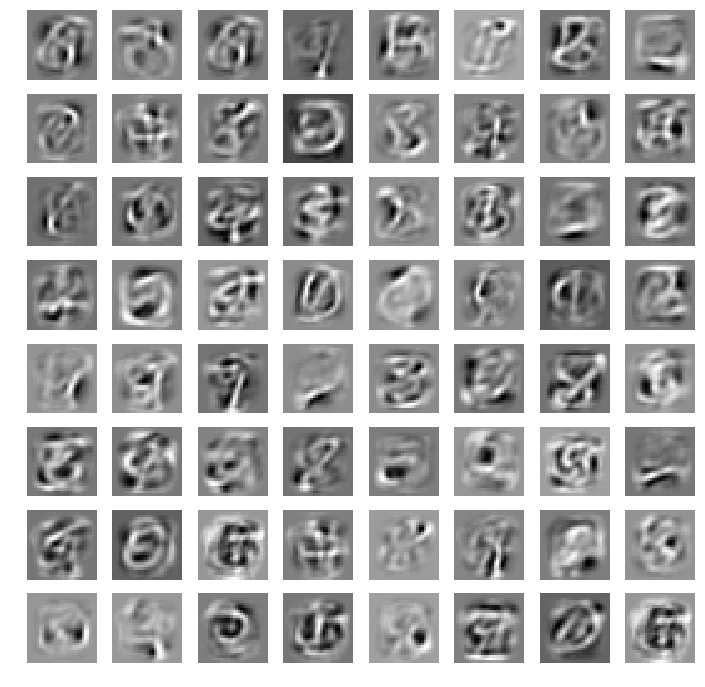

In [74]:
import matplotlib.pyplot as plt

model = EBMs_tensorflow.rbm.RestrictedBoltzmannMachine(m0, m1, batchsize=batchsize, path_log_dir=path_log_dir)

model.load_parameters(filename='RBM_tf_100_epoch')

utils.data_plot(model.dict_params['w'].transpose(), n=64)

plt.gcf().set_size_inches((12,12))

# Inference

In [151]:
importlib.reload(EBMs_tensorflow.ebm)
importlib.reload(EBMs_tensorflow.rbm)
importlib.reload(EBMs_tensorflow)


model = EBMs_tensorflow.rbm.RestrictedBoltzmannMachine(m0, m1, batchsize=batchsize, path_log_dir=path_log_dir)

model.load_parameters(filename='RBM_tf_80_epoch')

model.init_graph()
model.create_inference_graph(num_steps=20)

reading model parameters from file ../model_save/RBM_tf_80_epoch_20180720_113233.h5


In [152]:
X_dtr_subset = X_dtr[:64]
result = model.run_inference(x0_data=X_dtr_subset)


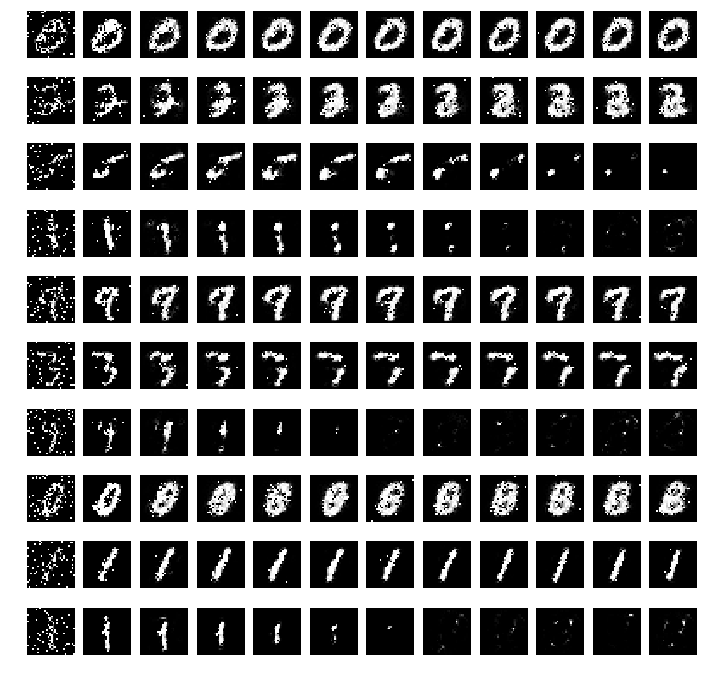

In [164]:
import matplotlib.pyplot as plt
n_example = 100
X_dtr_subset = X_dtr[:n_example]

yn_degradate = np.random.rand(model.M[0])<0.5
proportion_pos = np.mean(X_dtr[:n_example])
X_dtr_subset = X_dtr_subset*(1-yn_degradate) + (np.random.rand(n_example, model.M[0])<proportion_pos)*yn_degradate

# use clamp to make sure the clampled nodes will not be affected
model.clamp = {'x0': np.logical_not(yn_degradate)}
# model.clamp = None

model.init_graph()
model.create_inference_graph(num_steps=2)

result = model.run_inference(x0_data=X_dtr_subset, num_iter=12, yn_keep_history=True)

num_seed = 10
indexes_seed = np.random.permutation(64)[:num_seed]
h_fig, h_axes = plt.subplots(num_seed, num_iteration, figsize=[12, 12])
for j in range(num_iteration):
    for i, i_seed in enumerate(indexes_seed):
        plt.axes(h_axes[i, j])
        if j == 0:
            utils.data_plot(X_dtr_subset, i=i_seed)
        else:
            utils.data_plot(result['x0'][:,:,j-1], i=i_seed)


# result = {'p0': X_dtr_subset, 'x0': X_dtr_subset}

# num_iteration =12
# num_seed = 10
# indexes_seed = np.random.permutation(64)[:num_seed]
# h_fig, h_axes = plt.subplots(num_seed, num_iteration, figsize=[12, 12])
# for j in range(num_iteration):
#     for i, i_seed in enumerate(indexes_seed):
#         plt.axes(h_axes[i, j])
#         utils.data_plot(result['x0'], i=i_seed)
#     result = model.run_inference(x0_data=result['x0'])